In [77]:
#@title Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import unique
from numpy import where
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
# Import the sklearn  algorithms for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


In [30]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv('eda_university-rank.csv')
original_data.head()
original_data


,Unnamed: 0,university_name,world_rank,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
0,0,California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27.0,33.000000,67.000000
1,1,University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34.0,46.000000,54.000000
2,2,Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22.0,42.000000,58.000000
3,3,University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34.0,46.000000,54.000000
4,4,Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33.0,37.000000,63.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,Yeungnam University,601,South Korea,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,3.0,48.000000,52.000000
796,796,Yıldız Technical University,601,Turkey,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,2.0,36.000000,64.000000
797,797,Yokohama City University,601,Japan,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,3.0,49.538043,50.461957
798,798,Yokohama National University,601,Japan,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,8.0,28.000000,72.000000


In [31]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           800 non-null    int64  
 1   university_name      800 non-null    object 
 2   world_rank           800 non-null    int64  
 3   country              800 non-null    object 
 4   teaching             800 non-null    float64
 5   international        800 non-null    float64
 6   research             800 non-null    float64
 7   citations            800 non-null    float64
 8   income               800 non-null    float64
 9   num_students         800 non-null    float64
 10  student_staff_ratio  800 non-null    float64
 11  international%       800 non-null    float64
 12  female%              800 non-null    float64
 13  male%                800 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 87.6+ KB


In [32]:
original_data = original_data.reindex(np.random.permutation(original_data.index))
original_data=original_data.drop(['Unnamed: 0'], axis=1)


In [33]:

categorical_feature_names = ['country',"university_name"]
#we will not consider the word rank because it not apporting us any further information for our segmentation approch 
numeric_feature_names = list(set(original_data.columns) - set(categorical_feature_names) - set(original_data["world_rank"]))
numeric_feature_names

['female%',
 'international%',
 'world_rank',
 'international',
 'income',
 'teaching',
 'num_students',
 'research',
 'male%',
 'student_staff_ratio',
 'citations']

In [34]:
#in purpose to have columns values with the same scale we will standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(original_data[numeric_feature_names])
X_scaled

array([[ 0.82522013,  0.87691922,  0.22906876, ..., -0.82522013,
        -0.85209025, -0.11505435],
       [ 0.476362  ,  4.74395989, -0.54500832, ..., -0.476362  ,
        -0.28223187,  0.51761045],
       [-1.5295723 , -0.25489756, -1.59775314, ...,  1.5295723 ,
        -0.43472918,  0.27712383],
       ...,
       [-0.48299788, -1.00944208,  0.74512014, ...,  0.48299788,
        -0.1778916 , -0.74401935],
       [ 0.21471839, -0.16057949, -1.63903725, ..., -0.21471839,
         0.65683053,  1.77184066],
       [ 0.04028932, -0.34921562,  0.74512014, ..., -0.04028932,
        -0.12973456, -0.79211668]])

# **Performing a K-means Clustering**

In [35]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=4, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)
kmeans_clusters = unique(clusters)

In [36]:
kmeans_clusters 

array([0, 1, 2, 3], dtype=int32)

to choice the right number of cluster , the Elbow curve is an suitable solution ;
when the curve become constant we can choose the right number of cluster

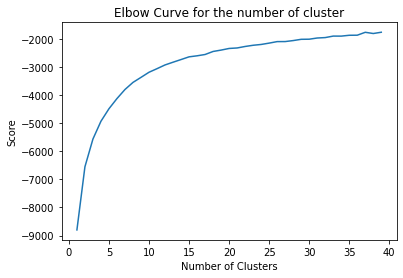

In [38]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 40
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve for the number of cluster')
plt.show()

we can decide after that the intenavals between [20 30] is the sutable number of cluster for our dataset

In [39]:
pd.pivot_table(original_data, index = ['university_name'], values = 'cluster').sort_values("cluster",ascending=True)

,cluster
university_name,
K.N. Toosi University of Technology,0
Polytechnic University of Valencia,0
Polytechnic University of Turin,0
Polytechnic University of Milan,0
Polytechnic University of Catalonia,0
...,...
University of Geneva,3
University of Fribourg,3
Lancaster University,3


in order to reduce the hight number of futures to two features so we can show the distribuation of each cluster we can perform the **Principal component analysis (PCA)**. It's a Linear dimensionality reduction who use Singular Value Decomposition of the data to project it to a lower dimensional space. 

[15 10  3  1 13  8  3  1 10 18 19 19 15 10 15 15 13  0 15  7  1 13 11 16
  6  8  7  2 16 15  4 16 17  4  4  7  9  1 18 13 13 16  0  1 16 13  2 16
  6  4 10 15  7 15 16 16 19  6 19  1 18  4 15 10  6 18  9  2 13  7  5 12
  9  2 15  1  8 13  5  1 18  1  5 13  7 19 11 16 19  2  2 13 16 15 16 15
  9  1 10 15  5 16 19  1 16 13  9  1  0 15  5  6 13  1  6  2 16  4  5  1
 18  6 13  1  7  9  5  6  0  9  0 13 16 10  6  6  5 17 12  8  2  4 13 11
  8 19  0  2 16 16  5  2  9  1 11  9 12  9 10 16 16 14  8  4 16 19 19  6
  2  5 12  2  0 18  9 15 16  1  4  6 19 10 18 19 19  2 13  9 11  7  9  9
 13  1 15  0 19  8  4 16 19  1  9  2 19 19  6  5  6  2 16 15  0 19 19 16
  8  8  9  9 15  7  6 10  8 15 10  2 17 17 10  1 16  6 13 19  4  4  0  2
  4  2 11  9  9 11 16 15 16  8 10 16  9  1 16 12  2 16 17  4 12 10  4 15
 17 19 15  2 19 16 19  1  0  7 11  4 10  9  9  2  0  7 17  4 15  1 15 18
  9  9  1  6 10 10 13 10  4 13  3 17  4 16  9  2  4  7  6  0 10 19  5 15
 18 13  2 19  7  1  7 11 18 13 13  7  6  7  7 13 15

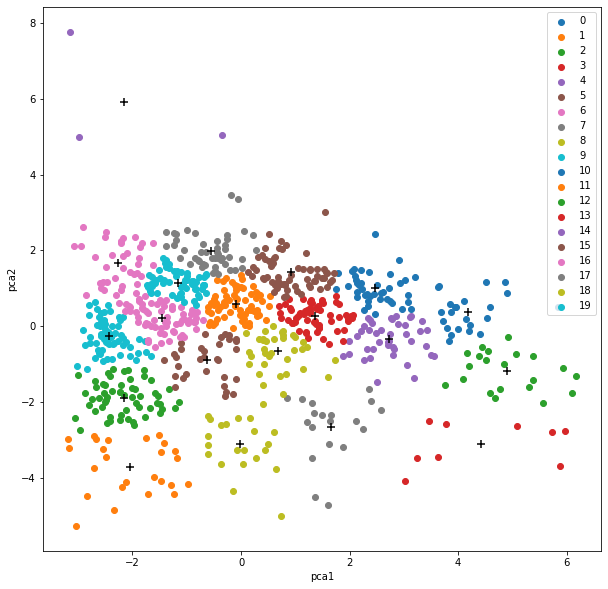

In [78]:

pca = PCA(2)
#Transform the data
df = pca.fit_transform(X_scaled)
#we will choose according to the elbow curve 20 cluster

kmeans = KMeans(n_clusters= 20)
label = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(10,10)) 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80,  linewidths=3,color = 'k', marker= "+")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.legend()
plt.show()


In [79]:
# Add cluster number to the original data
original_data_clustered = pd.DataFrame(X_scaled, columns=original_data[numeric_feature_names].columns, index=original_data[numeric_feature_names].index)
original_data_clustered['cluster'] = label
original_data['cluster'] = label
original_data.head()

,university_name,world_rank,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%,cluster
460,University of Neuchâtel,401,Switzerland,24.2,91.4,14.7,48.2,46.869594,4358.0,8.5,22.0,59.000000,41.000000,15
286,Royal College of Surgeons in Ireland,251,Republic of Ireland,29.9,90.1,20.1,65.3,33.900000,2473.0,15.6,63.0,55.000000,45.000000,10
46,Tsinghua University,47,China,73.3,39.5,83.0,58.8,100.000000,39763.0,13.7,10.0,32.000000,68.000000,3
332,University of Oregon,301,United States of America,21.2,33.5,22.7,72.6,30.800000,24418.0,20.2,11.0,52.000000,48.000000,1
176,University College Dublin,176,Republic of Ireland,35.0,86.3,38.5,70.8,33.500000,22193.0,24.5,23.0,49.538043,50.461957,13


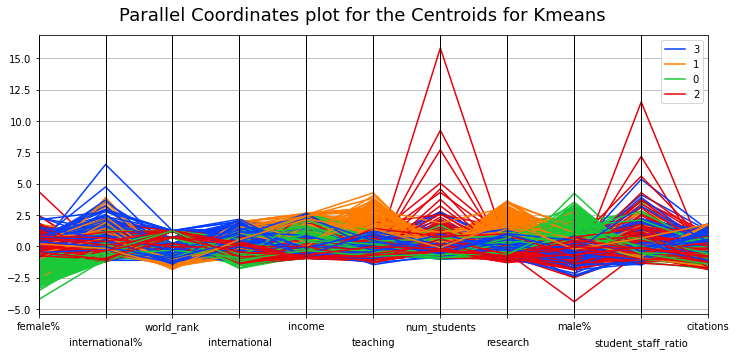

In [41]:
fig = plt.figure(figsize=(12, 5))
palette = sns.color_palette("bright", 10)

title = fig.suptitle("Parallel Coordinates plot for the Centroids for Kmeans", fontsize=18)
fig.subplots_adjust(top=0.9, wspace=0)

# Draw the chart
parallel_coordinates(original_data_clustered, 'cluster', color=palette)

# Stagger the axes
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks()[1::2]:
  tick.set_pad(20)    

In [42]:
original_data_clustered["cluster"].value_counts()

2    306
3    261
0    131
1    102
Name: cluster, dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba9fe683a0>,
      dtype=object)

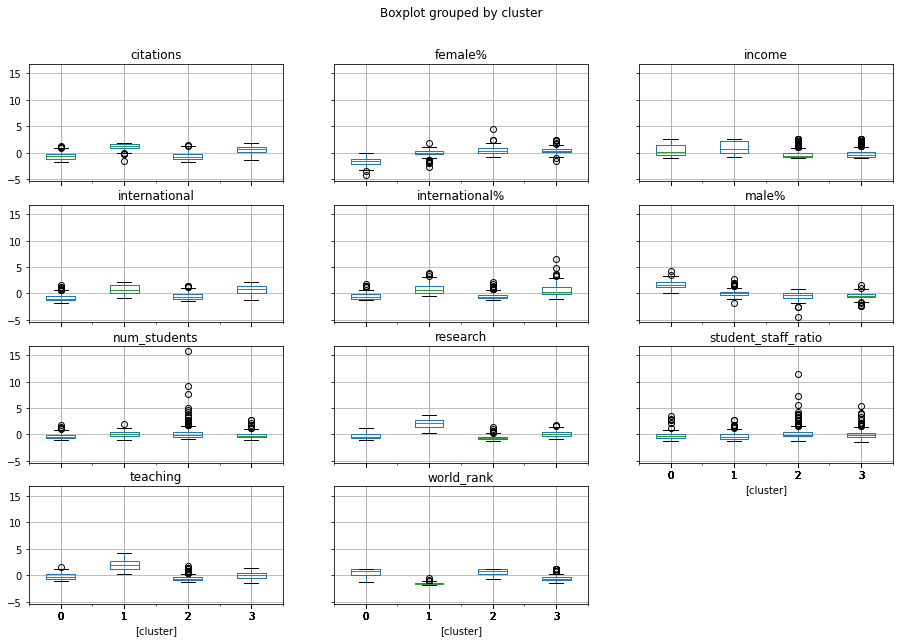

In [43]:
original_data_clustered.boxplot(by="cluster", figsize=(15,10))

# **performing Affinity Propagation clustering**

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


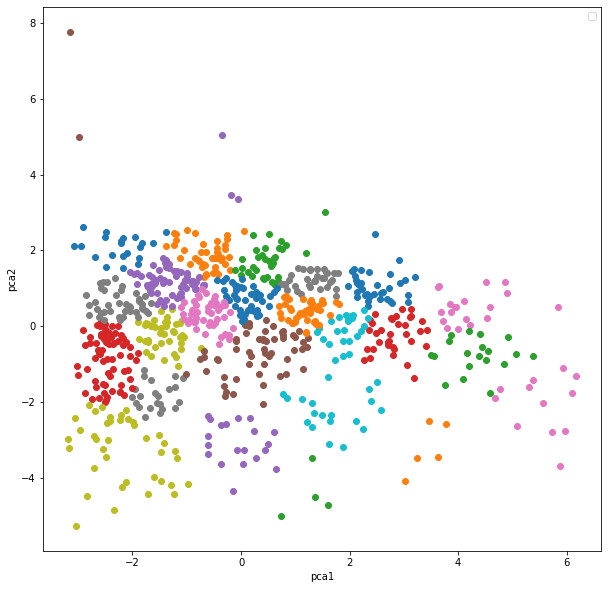

In [44]:
pca = PCA(2)
#Transform the data
df = pca.fit_transform(X_scaled)
#define the models
affinity_model = AffinityPropagation(damping=0.7)
# train the model
label=affinity_model.fit(df)
# assign each data point to a cluster
affinity_result = affinity_model.predict(df)
# get all of the unique clusters
affinity_clusters = unique(affinity_result)
print(affinity_clusters)


 
#plotting the results:
plt.figure(figsize=(10,10)) 
for affinity_cluster in affinity_clusters:
    # get data points that fall in this cluster
    index = where(affinity_result == affinity_cluster)
    # make the plot
    plt.scatter(df[index, 0],df[index, 1])


plt.xlabel("pca1")
plt.ylabel("pca2")
plt.legend()
plt.show()



In [45]:
max(affinity_clusters)

28

In [46]:
# Add cluster number to the original data
original_data_clustered_affinity_model = pd.DataFrame(X_scaled, columns=original_data[numeric_feature_names].columns, index=original_data[numeric_feature_names].index)
original_data_clustered_affinity_model['cluster'] = affinity_result

original_data_clustered_affinity_model

,female%,international%,world_rank,international,income,teaching,num_students,research,male%,student_staff_ratio,citations,cluster
460,0.825220,0.876919,0.229069,1.811945,-3.538289e-16,-0.493055,-0.881866,-0.687940,-0.825220,-0.852090,-0.115054,2
286,0.476362,4.743960,-0.545008,1.757037,-6.458467e-01,-0.112446,-0.965807,-0.411301,-0.476362,-0.282232,0.517610,0
46,-1.529572,-0.254898,-1.597753,-0.380148,2.645734e+00,2.785518,0.694766,2.811025,1.529572,-0.434729,0.277124,11
332,0.214718,-0.160579,-0.286983,-0.633569,-8.002174e-01,-0.693375,0.011433,-0.278105,-0.214718,0.086972,0.787695,26
176,0.000000,0.971237,-0.932047,1.596537,-6.657655e-01,0.228098,-0.087649,0.531319,0.000000,0.432098,0.721099,21
...,...,...,...,...,...,...,...,...,...,...,...,...
798,-1.878430,-0.443534,1.261172,-1.064385,-3.221663e-01,-0.766825,-0.625410,-0.621342,1.878430,-0.563148,-1.398883,28
174,0.389147,-0.066261,-0.937207,0.413905,2.267277e+00,0.461805,-0.589206,0.951400,-0.389147,3.209154,0.391817,21
502,-0.482998,-1.009442,0.745120,0.135142,-9.396489e-01,-0.693375,-0.373541,-0.734046,0.482998,-0.177892,-0.744019,8
39,0.214718,-0.160579,-1.639037,0.549063,2.167683e+00,1.403309,-0.095353,1.940126,-0.214718,0.656831,1.771841,3


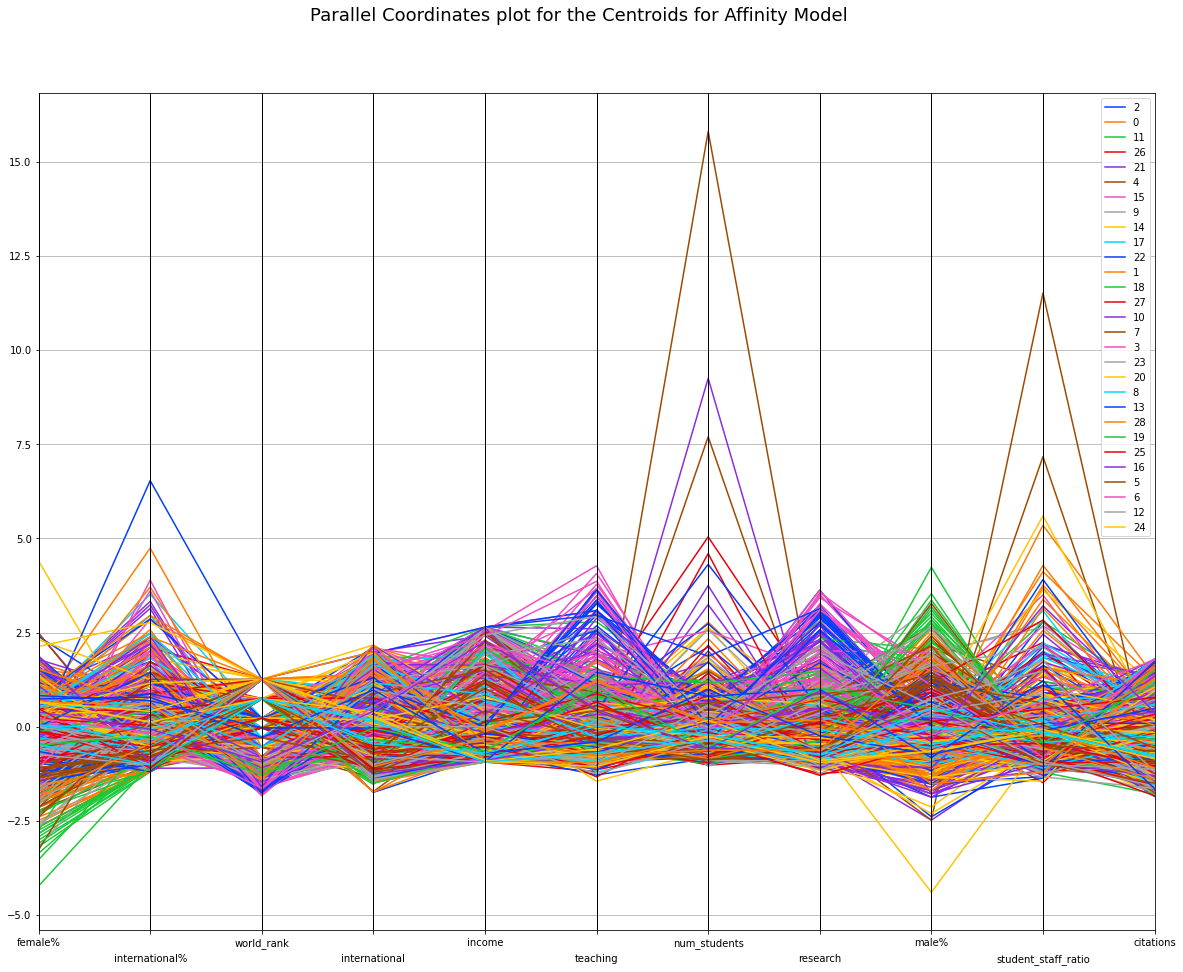

In [47]:
fig = plt.figure(figsize=(20, 15))
palette = sns.color_palette("bright", 10)

title = fig.suptitle("Parallel Coordinates plot for the Centroids for Affinity Model", fontsize=18)
fig.subplots_adjust(top=0.9, wspace=0)

# Draw the chart
parallel_coordinates(original_data_clustered_affinity_model, 'cluster', color=palette)

# Stagger the axes
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks()[1::2]:
  tick.set_pad(20)    

In [48]:
original_data_clustered_affinity_model["cluster"].value_counts()

14    62
23    50
26    48
21    44
20    43
1     43
27    41
8     40
15    38
0     35
3     35
17    34
2     34
13    26
19    25
28    23
7     22
10    21
4     20
22    19
9     19
16    19
25    17
18    16
6     12
11     5
12     4
24     3
5      2
Name: cluster, dtype: int64

# **Performing DBSCAN  clustering**

In [49]:

db = DBSCAN(eps=0.3, min_samples=10).fit(df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(unique(labels))
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

[-1  0  1  2  3  4  5]
Estimated number of clusters: 6
Estimated number of noise points: 309


In [50]:
original_data_clustered_DBSCAN = pd.DataFrame(X_scaled, columns=original_data[numeric_feature_names].columns, index=original_data[numeric_feature_names].index)
original_data_clustered_DBSCAN['cluster'] = labels
original_data_clustered_DBSCAN.tail(10)

,female%,international%,world_rank,international,income,teaching,num_students,research,male%,student_staff_ratio,citations,cluster
339,0.738006,0.782601,-0.286983,0.975656,-0.700623,-0.406249,0.981771,-0.242244,-0.738006,-0.105656,0.484312,1
548,0.650791,0.122375,0.745120,0.392787,-0.924710,-0.593215,0.172592,-0.897980,-0.650791,-0.073551,-0.758819,0
377,0.825220,0.688283,-0.028957,-0.038029,-0.924710,1.443373,0.803957,0.997506,-0.825220,1.218663,-1.646769,0
108,-0.482998,-0.254898,-1.282962,-0.038029,-0.655806,1.069442,-0.549172,1.023121,0.482998,-0.426703,1.124377,-1
632,0.650791,0.405329,1.261172,0.236511,-0.894832,-1.060628,-0.250233,-0.959455,-0.650791,-0.129735,-0.855013,0
798,-1.878430,-0.443534,1.261172,-1.064385,-0.322166,-0.766825,-0.625410,-0.621342,1.878430,-0.563148,-1.398883,-1
174,0.389147,-0.066261,-0.937207,0.413905,2.267277,0.461805,-0.589206,0.951400,-0.389147,3.209154,0.391817,0
502,-0.482998,-1.009442,0.745120,0.135142,-0.939649,-0.693375,-0.373541,-0.734046,0.482998,-0.177892,-0.744019,0
39,0.214718,-0.160579,-1.639037,0.549063,2.167683,1.403309,-0.095353,1.940126,-0.214718,0.656831,1.771841,-1
592,0.040289,-0.349216,0.745120,-0.456174,-0.695644,0.001068,-0.209131,-0.754538,-0.040289,-0.129735,-0.792117,0


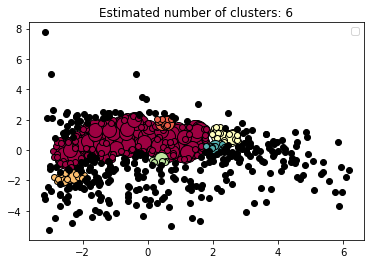

In [51]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy =df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.legend()
plt.show()

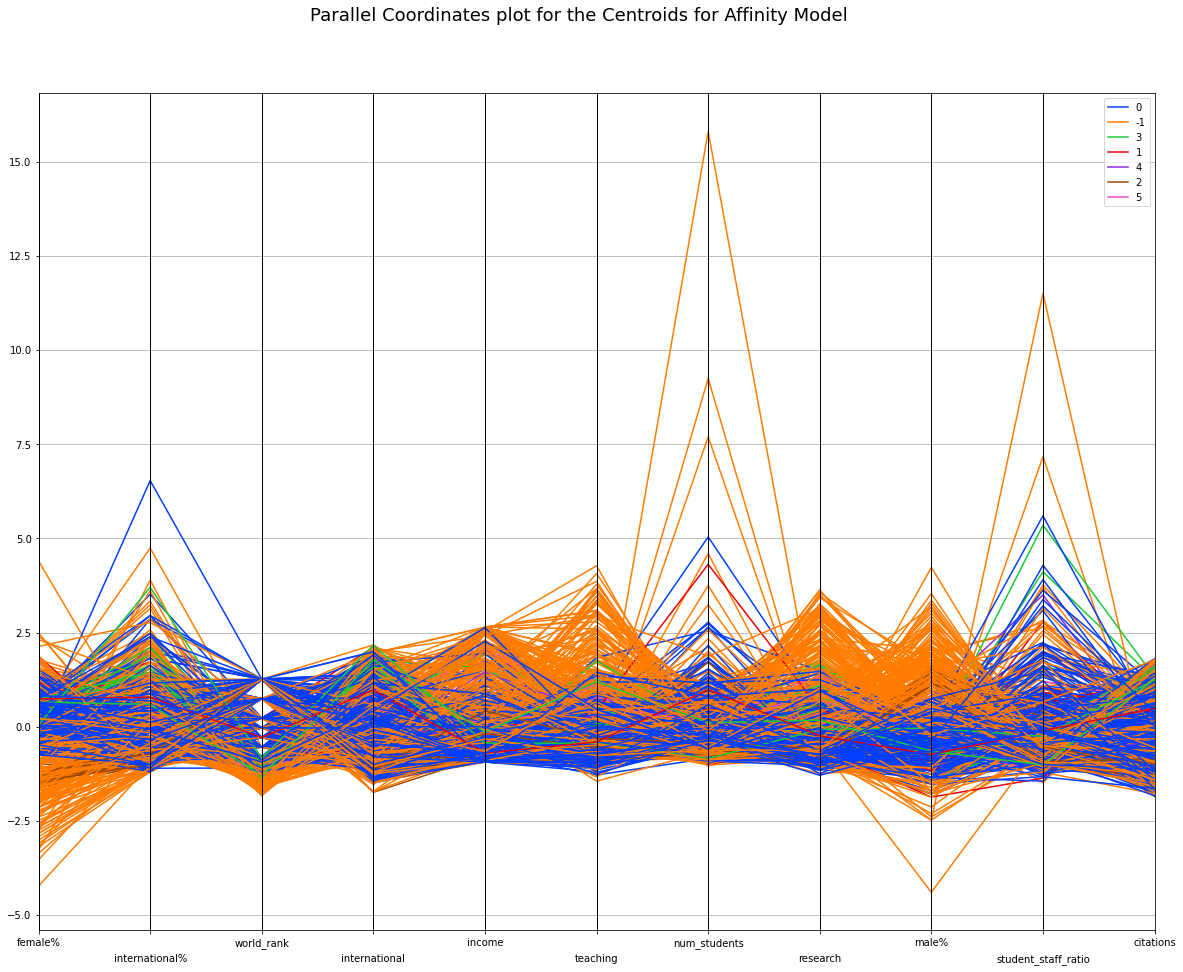

In [52]:
fig = plt.figure(figsize=(20, 15))
palette = sns.color_palette("bright", 10)

title = fig.suptitle("Parallel Coordinates plot for the Centroids for Affinity Model", fontsize=18)
fig.subplots_adjust(top=0.9, wspace=0)

# Draw the chart
parallel_coordinates(original_data_clustered_DBSCAN, 'cluster', color=palette)

# Stagger the axes
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(20) 


In [53]:
original_data_clustered_DBSCAN["cluster"].value_counts()

 0    416
-1    309
 3     26
 2     20
 1     13
 5     10
 4      6
Name: cluster, dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbaa0192340>,
      dtype=object)

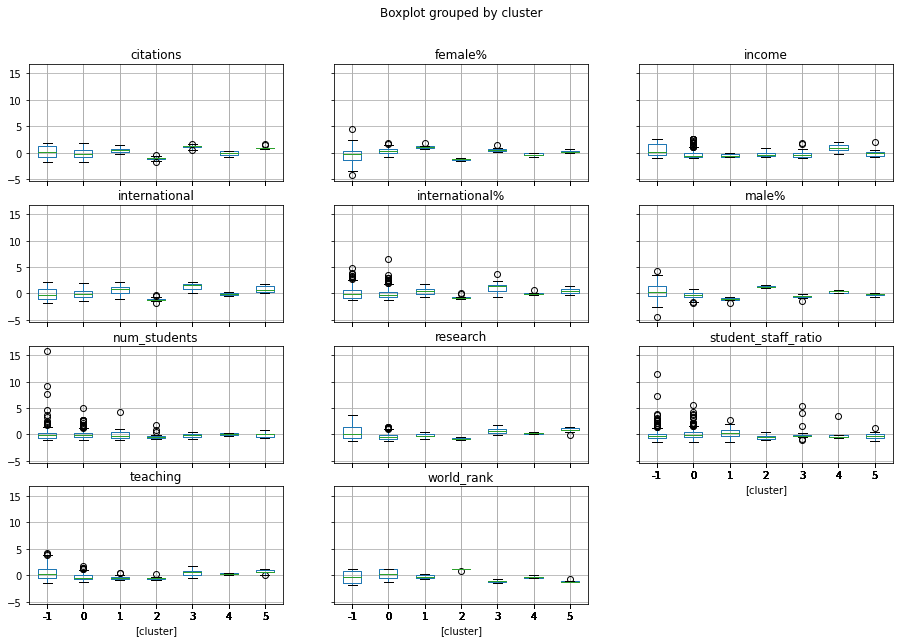

In [54]:
original_data_clustered_DBSCAN.boxplot(by="cluster", figsize=(15,10))

# **Performing Hierarchical Clustering**

In [55]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=4)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters) # count of data points in each cluster
# Read off 5 clusters:
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters)

array([235, 208, 300,  54,   3])

In [56]:
# Add cluster number to the original data
original_data_clustered_hierarchical = pd.DataFrame(X_scaled, columns=original_data[numeric_feature_names].columns, index=original_data[numeric_feature_names].index)
original_data_clustered_hierarchical['cluster'] = clusters

original_data_clustered_hierarchical.head()

,female%,international%,world_rank,international,income,teaching,num_students,research,male%,student_staff_ratio,citations,cluster
460,0.825220,0.876919,0.229069,1.811945,-3.538289e-16,-0.493055,-0.881866,-0.687940,-0.825220,-0.852090,-0.115054,1
286,0.476362,4.743960,-0.545008,1.757037,-6.458467e-01,-0.112446,-0.965807,-0.411301,-0.476362,-0.282232,0.517610,2
46,-1.529572,-0.254898,-1.597753,-0.380148,2.645734e+00,2.785518,0.694766,2.811025,1.529572,-0.434729,0.277124,3
332,0.214718,-0.160579,-0.286983,-0.633569,-8.002174e-01,-0.693375,0.011433,-0.278105,-0.214718,0.086972,0.787695,2
176,0.000000,0.971237,-0.932047,1.596537,-6.657655e-01,0.228098,-0.087649,0.531319,0.000000,0.432098,0.721099,2


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [52.5, 52.5, 80.0, 80.0],
  [35.0, 35.0, 66.25, 66.25],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [100.0, 100.0, 130.0, 130.0],
  [50.625, 50.625, 115.0, 115.0],
  [12.5, 12.5, 82.8125, 82.8125],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [164.375, 164.375, 212.5, 212.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [242.5, 242.5, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [365.0, 365.0, 3

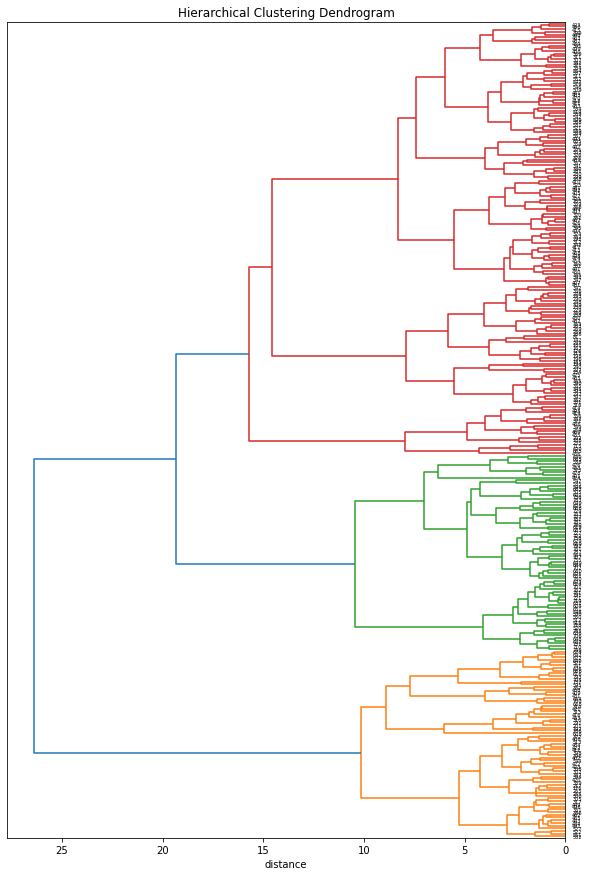

In [57]:
# Show a dendrogram, just for the first smallest cluster
from scipy.cluster.hierarchy import linkage, fcluster 
sample = original_data_clustered_hierarchical[original_data_clustered_hierarchical.cluster==2]
Z = linkage(sample, 'ward') 
names = sample.index 
plt.figure(figsize=(10,15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
dendrogram(Z,labels = names,orientation = "left",)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

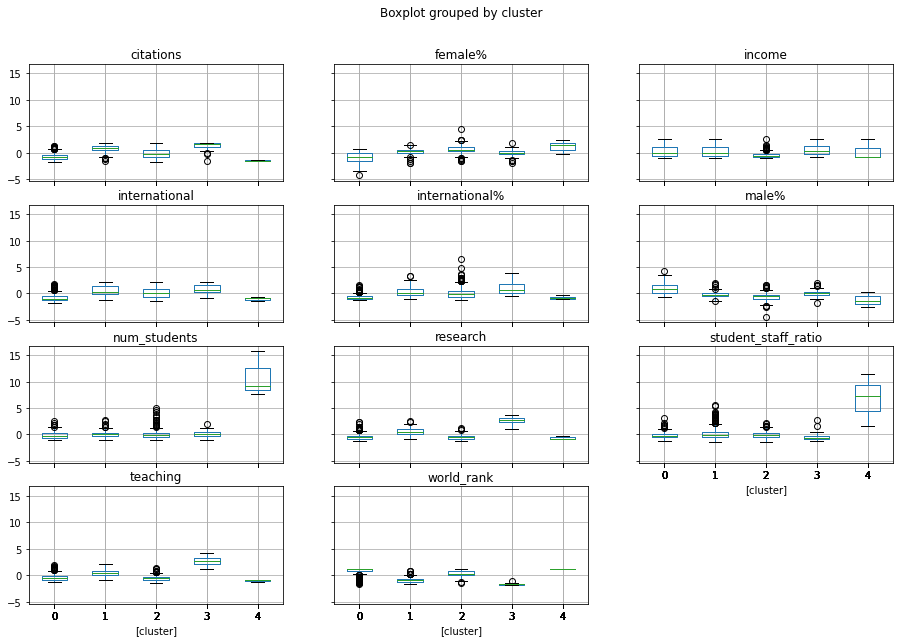

In [71]:
original_data_clustered_hierarchical.boxplot(by="cluster", figsize=(15,10))
original_data_clustered_hierarchical.boxplot??

In [59]:
original_data_clustered_hierarchical["cluster"].value_counts()

2    300
0    235
1    208
3     54
4      3
Name: cluster, dtype: int64

# **Clustering performance evaluation**

for the purpose to evaluate our clustering algorithms we will calculates :
Intrinsic Measures:  measures  who do not require ground truth labels (applicable to all unsupervised learning results)

**Silhouette Coefficient** 
 measures the between-cluster distance against within-cluster distance.  here is some of theirs spécifications


*  A higher score signifies better-defined clusters.
*  Silhouette Coefficient has a range of [-1, 1], from incorrect clustering to highly dense clustering, with 0 being overlapping clusters. 

*  The bounded range makes it easy to compare the scores between different algorithms.
*  Silhouette Coefficient follows the general definition of good clusters being dense and well-separated.






In [68]:
s = silhouette_score(original_data_clustered, label, metric="euclidean")
print("the silhouette_score for the Kmeans clustering is ", s)

s = silhouette_score(original_data_clustered_affinity_model, affinity_result , metric="euclidean")
print("the silhouette_score for AffinityPropagation clustering is ", s)

s = silhouette_score(original_data_clustered_DBSCAN, labels, metric="euclidean")
print("the silhouette_score for the DBSCAN clustering is ", s)

s = silhouette_score(original_data_clustered_hierarchical, clusters, metric="euclidean")
print("the silhouette_score for the  Hierarchical  clustering is ", s)

the silhouette_score for the Kmeans clustering is  0.3309294616374042
the silhouette_score for AffinityPropagation clustering is  0.3102136739602897
the silhouette_score for the DBSCAN clustering is  0.01673529534554357
the silhouette_score for the  Hierarchical  clustering is  0.2197471572375111


**Calinski-Harabasz Index** or Variance Ratio Criterion,measures the between-cluster dispersion against within-cluster dispersion  where dispersion is the sum of distance squared ==>A higher score signifies better-defined clusters.


In [69]:
s = calinski_harabasz_score(original_data_clustered, label)
print("the calinski_harabasz_score for the Kmeans clustering is ", s)

s = calinski_harabasz_score(original_data_clustered_affinity_model, affinity_result)
print("the calinski_harabasz_score for AffinityPropagation clustering is ", s)

s = calinski_harabasz_score(original_data_clustered_DBSCAN, labels)
print("the calinski_harabasz_score for the DBSCAN clustering is ", s)

s = calinski_harabasz_score(original_data_clustered_hierarchical, clusters)
print("the silhouette_score for the  Hierarchical  clustering is ", s)

the calinski_harabasz_score for the Kmeans clustering is  381.6029257344859
the calinski_harabasz_score for AffinityPropagation clustering is  595.3808427268799
the calinski_harabasz_score for the DBSCAN clustering is  37.24801524699385
the silhouette_score for the  Hierarchical  clustering is  178.47324821894944


**Davies-Bouldin Index** measures the size of clusters against the average similarity distance between clusters ,where similarity compares the size of clusters against the between-cluster distance ==> A lower score signifies better-defined clusters.


In [70]:
s = davies_bouldin_score(original_data_clustered, label)
print("the davies_bouldin_score for the Kmeans clustering is ", s)

s = davies_bouldin_score(original_data_clustered_affinity_model, affinity_result)
print("the davies_bouldin_score for AffinityPropagation clustering is ", s)

s = davies_bouldin_score(original_data_clustered_DBSCAN, labels)
print("the davies_bouldin_score for the DBSCAN clustering is ", s)

s = davies_bouldin_score(original_data_clustered_hierarchical, clusters)
print("the silhouette_score for the  Hierarchical  clustering is ", s)

the davies_bouldin_score for the Kmeans clustering is  1.285814856544933
the davies_bouldin_score for AffinityPropagation clustering is  1.3659334079294083
the davies_bouldin_score for the DBSCAN clustering is  1.8056556346625647
the silhouette_score for the  Hierarchical  clustering is  1.3458893739538724


# **conclusion** 

*   acording to the Intrinsic Measures used to evaluate our clustering algorithms we can conclude that the best algorithm is our case is Kmeans , then AffinityPropagation , hierarchical and finally DBSAN
*  we can extract the features of ech cluster withn each algorithm with the Parallel Coordinates plot , the high peak is an important feature that characterize this cluster and vice versa.
* the box plot method showed in each algorithm  depicte graphically 
groups of numerical data through their quartiles.
The box extends from the Q1 to Q3 quartile values of the data,
with a line at the median (Q2). so we can see the disbribuation and the particularities of each numerical feature
the  Outliers are plotted as separate dots.




